In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import dblquad

In [2]:
def func(th, z, eta, d):
    return np.exp(-eta/2*((1 - np.cos(th) + d)**2 + (np.sin(th) - z)**2))

In [3]:
def estimate_kon(exp, nt, eta, d):
    N = 2**exp
    th_mesh = np.linspace(-np.pi/2, np.pi/2, N+1)[:-1]
    nu = th_mesh[1] - th_mesh[0]
    th_mesh += nu/2
    
    bond_max = nt*nu
    return np.sqrt(2*np.pi/eta)*bond_max*np.sum(np.exp(-eta/2*(1-np.cos(th_mesh) + d)**2))

In [4]:
L = 2.5
dblquad(func, -L, L, -np.pi/2, np.pi, (2.34e4, .01))

/Users/andrewwork/anaconda3/lib/python3.7/site-packages/scipy/integrate/quadpack.py:385: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  warnings.warn(msg, IntegrationWarning)


(0.000270494955869168, 2.0926673550384156e-06)

In [5]:
estimate_kon(4, 1024, 2.34e4, .01)

0.505297883195726

In [12]:
d = .01
eta = 2.34e4
num = 1024
th = np.linspace(-np.pi/4, np.pi/4, num=5)
z = np.linspace(-L/100, L/100, num=num)

y = np.exp(-eta/2*((1 - np.cos(th[None, :]) + d)**2 + (np.sin(th[None, :]) - z[:, None])**2))

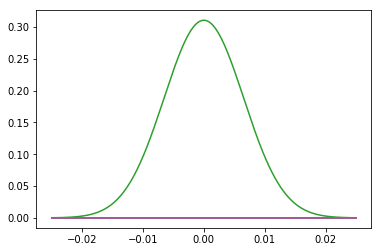

In [13]:
plt.plot(z, y)
plt.show()